In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set

# Get user input for the year start date
input_date = dt.datetime.strptime(input("Please enter the start date (Format: 'YYYY-MM-DD'): "), "%Y-%m-%d")

# Save it as date
year_start_date = input_date.date()

# Calculate the end date
year_end_date = year_start_date + dt.timedelta(days=365)

print(f"Entered Start Date is {year_start_date}")
print(f"End Date is {year_end_date}")

# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
tmin, tavg, tmax = calc_temps(year_start_date, year_end_date)[0]
print(f"The minimum temperature between {year_start_date} and {year_end_date} was {tmin} F")
print(f"The maximum temperature between {year_start_date} and {year_end_date} was {tmax} F")
print(f"The average temperature between {year_start_date} and {year_end_date} was {round(tavg,2)} F")


Please enter the start date (Format: 'YYYY-MM-DD'): 2017-08-09
Entered Start Date is 2017-08-09
End Date is 2018-08-09
The minimum temperature between 2017-08-09 and 2018-08-09 was 70.0 F
The maximum temperature between 2017-08-09 and 2018-08-09 was 85.0 F
The average temperature between 2017-08-09 and 2018-08-09 was 78.64 F


y error: 15.0


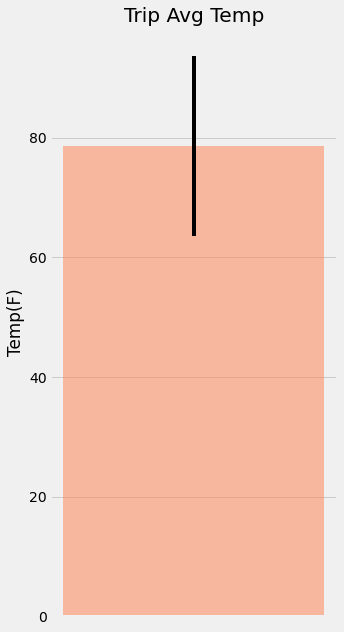

In [11]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# Calculate the y error
y_error = tmax - tmin
xpos = 1
print(f'y error: {y_error}')

# Plot the results as bar chart
plt.figure(figsize=(5,9))
plt.bar(x=1, height=tavg, yerr=y_error, alpha = 0.5, align = 'center', color='coral')
plt.xticks([])
plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp')
plt.tight_layout()
plt.savefig("./Images/Trip_Avg_Temp.png")
plt.show()

### Daily Rainfall Average

In [12]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_start_date = '2011-01-01'
trip_end_date = '2012-01-01'

rain_per_station = (
    session.query(stations.station, 
                  stations.name, 
                  stations.latitude,
                  stations.longitude,
                  stations.elevation,
                  func.avg(Measurement.prcp)
                 ).filter(
                        Measurement.station == stations.station, 
                        Measurement.date.between(trip_start_date, trip_end_date))
                .group_by(stations.station)
                .order_by(func.avg(Measurement.prcp).desc())
                .all()
)
rain_per_station
# Convert result to dataframe
rain_per_station_df = pd.DataFrame(np.array(rain_per_station))

# Rename the columns
rain_per_station_df = rain_per_station_df.rename(
    columns={
        0: "Station",
        1: "Location",
        2: "Latitude",
        3: "Longitude",
        4: "Elevation",
        5: "Total Precipitation"
    })

rain_per_station_df

,Station,Location,Latitude,Longitude,Elevation,Total Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,0.3906824925816024
1,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6,0.31083333333333335
2,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84888999999998,32.9,0.21538674033149185
3,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,0.18174285714285718
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0,0.14536000000000002
5,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9,0.1037301587301587
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.0906336088154271
7,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,0.06450000000000004
8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.3152,-157.9992,0.9,0.045722222222222185


In [13]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [14]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d')
print(f"Range of Dates are: {date_range}")
# Strip off the year and save a list of strings in the format %m-%d
mm_dd = pd.date_range(start_date, end_date).strftime('%m-%d')

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.

normal_temps = [daily_normals(date) for date in mm_dd]
    
print(f"The daily normals for the Range of dates are: {normal_temps}")

Range of Dates are: Index(['2017-08-01', '2017-08-02', '2017-08-03', '2017-08-04', '2017-08-05',
       '2017-08-06', '2017-08-07'],
      dtype='object')
The daily normals for the Range of dates are: [[(67.0, 75.54, 83.0)], [(68.0, 75.60377358490567, 84.0)], [(70.0, 76.61111111111111, 85.0)], [(69.0, 76.71153846153847, 84.0)], [(69.0, 76.14814814814815, 82.0)], [(67.0, 76.25, 83.0)], [(71.0, 77.15686274509804, 83.0)]]


In [15]:
# flatten the normals_temps list
normals = [temp for sublist in normal_temps for temp in sublist]
print(normals)

[(67.0, 75.54, 83.0), (68.0, 75.60377358490567, 84.0), (70.0, 76.61111111111111, 85.0), (69.0, 76.71153846153847, 84.0), (69.0, 76.14814814814815, 82.0), (67.0, 76.25, 83.0), (71.0, 77.15686274509804, 83.0)]


In [16]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns= ["tmin", "tavg", "tmax"], index=date_range)
normals_df.index.name='date'
normals_df

,tmin,tavg,tmax
date,,,
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


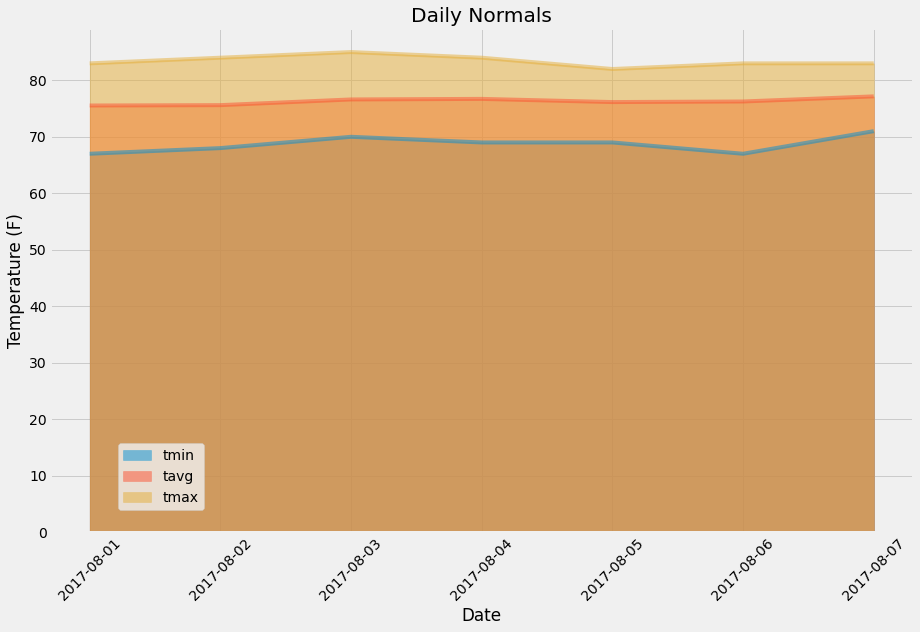

In [17]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False, figsize=(13,9))
plt.title('Daily Normals')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.xticks(rotation=45)
plt.legend(loc = 'lower left', bbox_to_anchor=(0.07, 0.03))
plt.tight_layout()
plt.savefig('./Images/Daily_Normals.png')
plt.show()

## Close Session

In [18]:
session.close()